# Part I - (Dataset Exploration Title)
## by (your name here)

## Introduction
> Introduce the dataset

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
bikes = pd.read_csv('201902-fordgobike-tripdata.csv')

print(bikes.shape)
bikes.head()

(183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### What is the structure of your dataset?

> The dataset consists of 183 412 rows spread over 16 columns where most are float and string with two integer column 

### What is/are the main feature(s) of interest in your dataset?

>  At what time during which weekday do most people use a bike from ford bike share.

>  1. The average travel time over time(date)
>  2. Do members have a longer travel time then nonmembers?
>  3. What is the Average traveltime per weekday, Which customertypes travels more?
>  4. What is the age of customer and non customers?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The following columns; start_time 

> 1. duration_sec, start_time
> 2. duration_sec, user_type
> 3. duration_sec, start_time, user_type
> 4. user_type, member_birth_year

## Cleaning dataset

In [4]:
#Special funtion to overcome repetitious code
#Function which set the plot title, xlabel and ylabel

def plot_info(title="", xlabel="", ylabel=""):
    z = []
    if title:
        z.append(plt.title(title))
    if xlabel:
        z.append(plt.xlabel(xlabel))
    if ylabel:
        z.append(plt.ylabel(ylabel))
    return z

In [5]:
#drop na columns
bikes.dropna(inplace=True)
#Convert date strings to datetime objects
bikes['start_time'] = pd.to_datetime(bikes['start_time'])
bikes['end_time'] = pd.to_datetime(bikes['end_time'])

In [6]:
#Conver birthyear and start_station_id to int
bikes['member_birth_year'] = bikes['member_birth_year'].astype(int)
bikes['start_station_id'] = bikes['start_station_id'].astype(int)

In [7]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int32         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [8]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
c = sb.color_palette()[0]

## Univariate Exploration


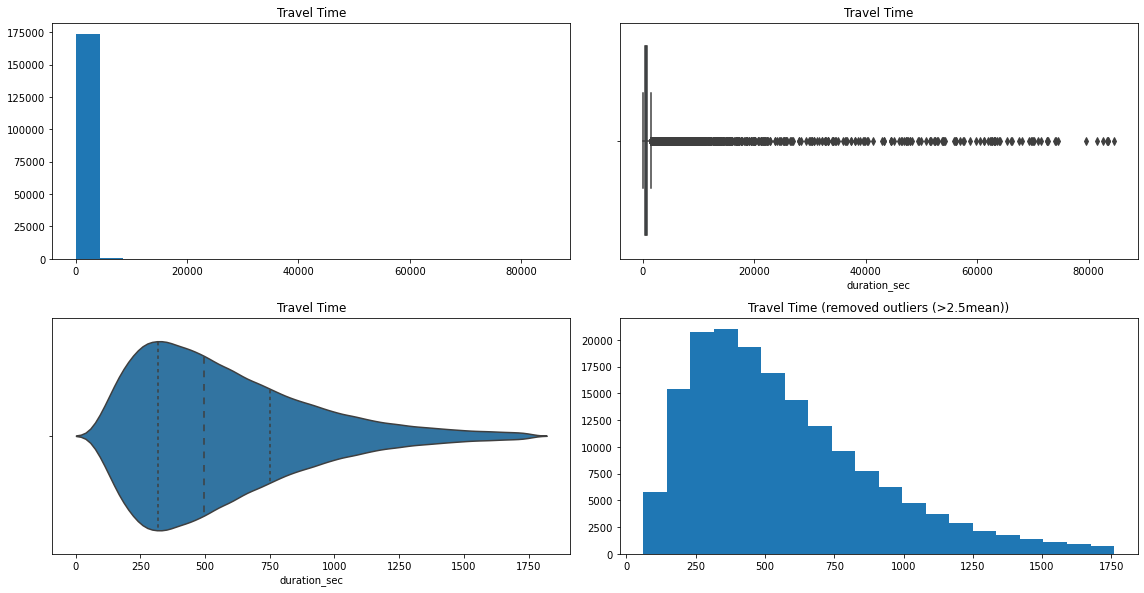

In [9]:
#Travel Time
fig = plt.figure(figsize=[16,12])

plt.subplot(3,2,1)
plt.hist(data=bikes, x='duration_sec', bins=20)
plot_info("Travel Time")

plt.subplot(3,2,2)
sb.boxplot(data=bikes, x='duration_sec')
plot_info("Travel Time")

plt.subplot(3,2,3)
sb.violinplot(data=bikes[bikes['duration_sec'] < 2.5*bikes.duration_sec.mean()], x='duration_sec', inner='quartile')
plot_info("Travel Time")

plt.subplot(3,2,4)
plt.hist(data=bikes[bikes['duration_sec'] < 2.5*bikes.duration_sec.mean()], x='duration_sec', bins=20)
plot_info("Travel Time (removed outliers (>2.5mean))")

plt.tight_layout()


Looking at the trip duration data we found that there are some extreme outliers excisted that far extended over the mean tripduration but didn't extend further then 24 hours. Thats why I left them in the data and only cut them out in the 2 lowest visualisation to make a clearer overview of the data.
After deleting the outliers the data is skewet to the right. Most durations are between 200 and 1000.

In [10]:
#Start Time
print(bikes['start_time'].min())
print(bikes['start_time'].max())

2019-02-01 00:00:20.636000
2019-02-28 23:59:18.548000


The data is only from the month February 2019

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
Name: start_station_name, dtype: int64

Tail:
 Farnam St at Fruitvale Ave        9
Parker Ave at McAllister St       7
21st Ave at International Blvd    4
Palm St at Willow St              3
16th St Depot                     2
Name: start_station_name, dtype: int64


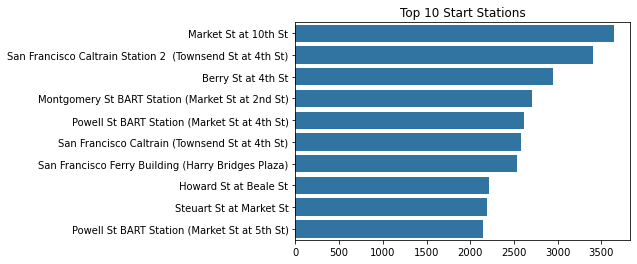

In [11]:
#Bar plot of top or bottom N number of highest frequencie
def top_n(data, n, title='Title', bottom=False, color=c):
    if bottom == False:
        s_list = data.value_counts()[:n]
    else:
        s_list = data.value_counts()[-n:]
    sb.barplot(x=s_list.values, y= s_list.index, color=c)
    plt.title(title);


#Start station
print(bikes['start_station_name'].value_counts().head())
print('\nTail:\n',bikes['start_station_name'].value_counts().tail())

#Top used Start stations

top_n(bikes['start_station_name'], 10, 'Top 10 Start Stations')

Here are dislayed the most used starting stations with over 3500 trip started from that station in one month.
What will the least used station be?

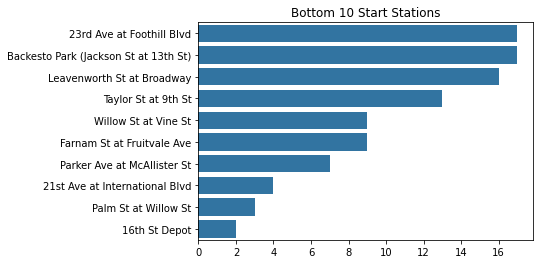

In [12]:
#Start stations
#Least used start station
top_n(bikes['start_station_name'], 10, 'Bottom 10 Start Stations', bottom=True)

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Market St at 10th St                                         3709
Montgomery St BART Station (Market St at 2nd St)             3461
San Francisco Ferry Building (Harry Bridges Plaza)           3151
San Francisco Caltrain (Townsend St at 4th St)               2870
Name: end_station_name, dtype: int64

Tail:
 Parker Ave at McAllister St       9
Palm St at Willow St              7
16th St Depot                     6
Willow St at Vine St              5
21st Ave at International Blvd    5
Name: end_station_name, dtype: int64


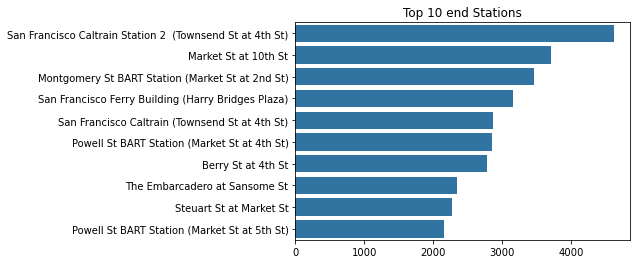

In [13]:
#End station
print(bikes['end_station_name'].value_counts().head())
print('\nTail:\n',bikes['end_station_name'].value_counts().tail())

#Top used End stations

top_n(bikes['end_station_name'], 10, 'Top 10 end Stations')


THis are the most used end stations. Apperently some endstation are used more frequently (over 4500) then start stations in the month February.
What will the least used endstation be?

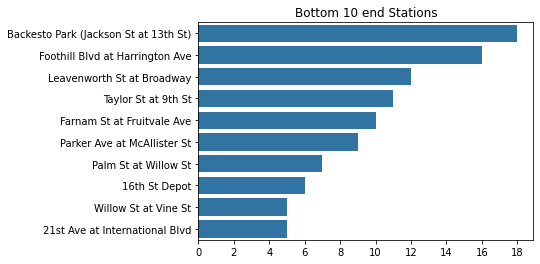

In [14]:
#End stations
#Least used start station
top_n(bikes['end_station_name'], 10, 'Bottom 10 end Stations', bottom=True)
#plt.xticks(range(0, s_list.max()+2,2), range(0, s_list.max()+2,2));
plt.xticks(range(0, 20,2), range(0, 20,2));

How often are the average bikes been used and how often are the most used bikes used?

4794    179
4814    172
5175    167
4450    166
5145    165
Name: bike_id, dtype: int64

Tail:
 350     1
34      1
362     1
1011    1
5067    1
Name: bike_id, dtype: int64

Average rides per bike in use:
 38


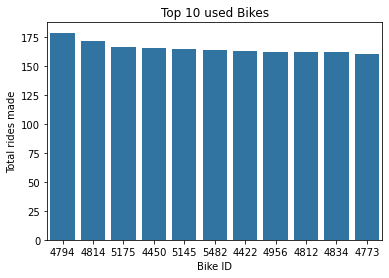

In [15]:
#Bike ID
print(bikes['bike_id'].value_counts().head())
print('\nTail:\n',bikes['bike_id'].value_counts().tail())
print('\nAverage rides per bike in use:\n',round(bikes['bike_id'].value_counts().mean()))

topN = 10
s_list = bikes['bike_id'].value_counts()[:topN+1]
sb.barplot(y=s_list.values, x= s_list.index, color=c, order=s_list[:topN+1].index)
plot_info("Top {} used Bikes".format(topN),"Bike ID", "Total rides made" );
# plt.title("Top {} used Bikes".format(topN))
# plt.xlabel("Bike ID")
# plt.ylabel("Total rides made");


Do subscribers make more often use of the servers or are it often new customers?

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64


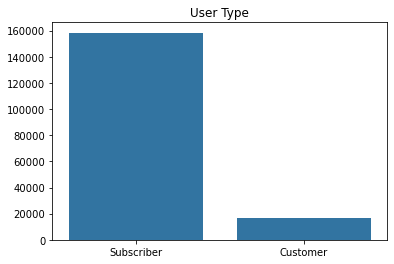

In [16]:
#UserType
user_types =bikes['user_type'].value_counts()
print(user_types)
sb.barplot(x=user_types.index, y=user_types.values, color=c)
plt.title('User Type');

Clearly subscribers of the service make the most use of the service. Maybe it would be interesting for the company to focus on accruing those customers. 

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64


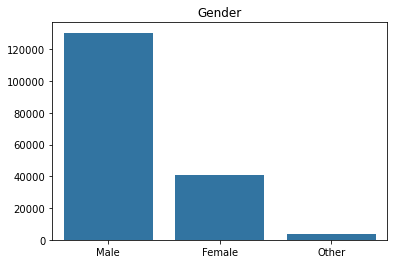

In [17]:
#Gender
user_gender =bikes['member_gender'].value_counts()
print(user_gender)
sb.barplot(x=user_gender.index, y=user_gender.values, color=c)
plt.title("Gender");

What gender makes the most use of the service?
Clearly for the most part customer using the service are male.

count    174952.000000
mean       1984.803135
std          10.118731
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64


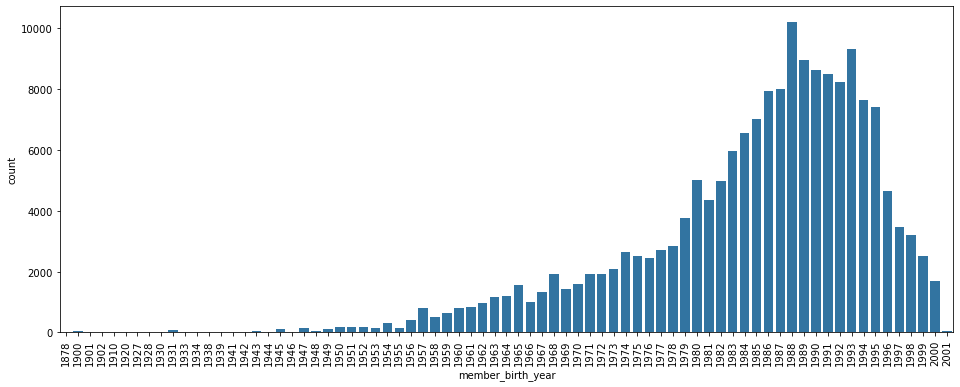

In [18]:
#Birthyear
print(bikes['member_birth_year'].describe())
fig= plt.figure(figsize=[16,6])
birth_year = bikes['member_birth_year'].value_counts()
sb.barplot(x=birth_year.index, y=birth_year.values)
sb.countplot(x=bikes['member_birth_year'], color=c)
plt.xticks(rotation=90);

What birthyear does make use the most of the service?
The most customers are born between 1980 and 2000. Since the data is from 2019 they would be between 39 and 19 years old.

Text(0.5, 1.0, 'average rides per weekday')

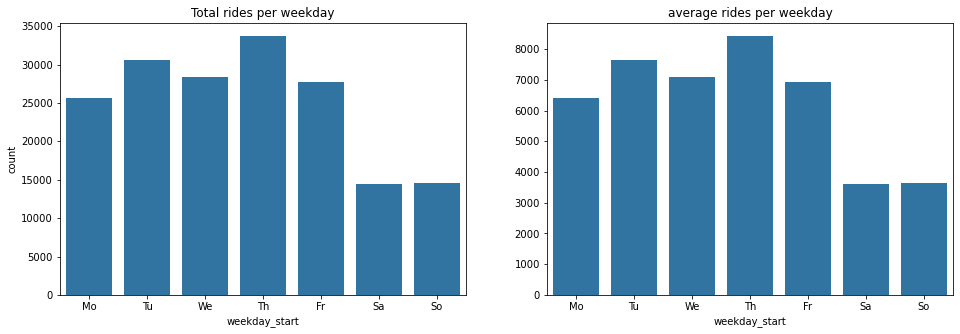

In [19]:
#Average ride per weekday
bikes['weekday_start'] = bikes["start_time"].dt.dayofweek
fig = plt.figure(figsize=[16, 5])
plt.subplot(1,2,1)
sb.countplot(data=bikes, x='weekday_start', color=c)
plt.xticks([0,1,2,3,4,5,6],['Mo','Tu','We', 'Th','Fr',"Sa",'So']);
plt.title("Total rides per weekday")

plt.subplot(1,2,2)
bikes['start_date'] = bikes['start_time'].dt.date
avg_weekday= round(bikes.groupby('weekday_start').count()['start_time'].sort_index() / 
              bikes[["start_date",'weekday_start']].drop_duplicates()["weekday_start"].value_counts().sort_index())
sb.barplot(x=avg_weekday.index, y=avg_weekday.values, color=c)
avg_weekday
plt.xticks([0,1,2,3,4,5,6],['Mo','Tu','We', 'Th','Fr',"Sa",'So']);

plt.title("average rides per weekday")

What weekday is the bussiest and how much rides on average where made on these days?
Thursday seems to be the most popular day. Also interesting to see is that during the week more rides are started compared to the weekend.

Text(0, 0.5, 'Count Trips')

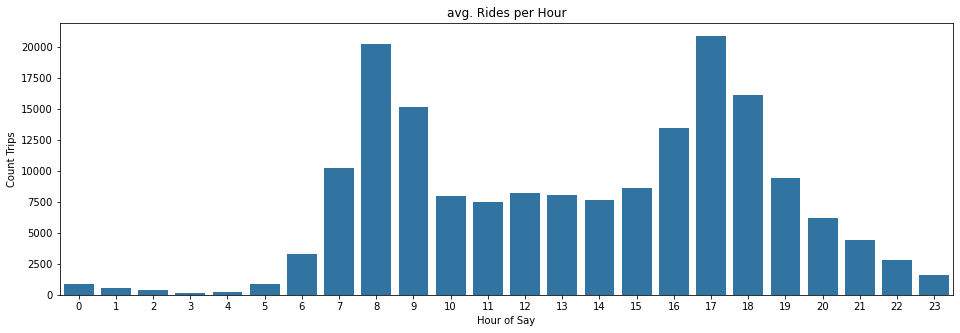

In [20]:
#Average ride per hour
bikes['hour_start'] = bikes["start_time"].dt.hour
fig = plt.figure(figsize=[16, 5])
sb.countplot(data=bikes, x='hour_start', color=c)
plt.title("avg. Rides per Hour")
plt.xlabel('Hour of Say')
plt.ylabel("Count Trips")
# plt.subplot(1,2,2)
# bikes['start_date'] = bikes['start_time'].dt.date
# avg_weekday= round(bikes.groupby('weekday_start').count()['start_time'].sort_index() / 
#               bikes[["start_date",'weekday_start']].drop_duplicates()["weekday_start"].value_counts().sort_index())
# sb.barplot(x=avg_weekday.index, y=avg_weekday.values, color=c)
# avg_weekday

# plt.title("average rides per weekday")

During what our most customer make use of the service?
Out of the barchart we see that during working ours most customer make use of our service.
It would be interesting to make a heatmap which shows during which weekday and what our most rides take place.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Inside the average travelt time column there are some extreme outlires. Those weren't removed since they do not extent over 24 hours

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Hour and weekday colums were added to make it easy to create inside regardingtravel time

## Bivariate Exploration

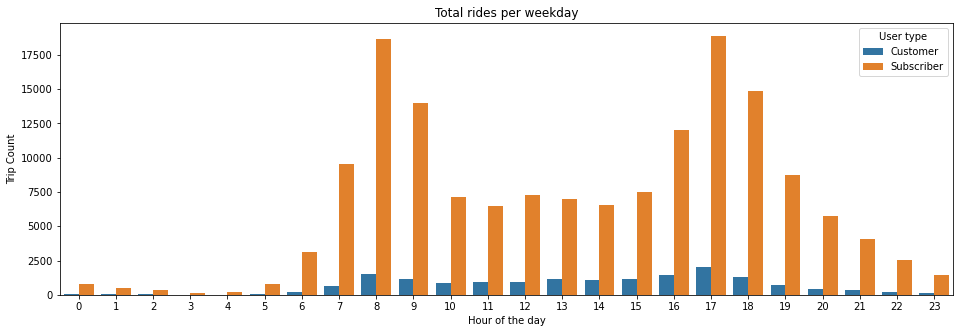

In [21]:
#Average ride per hour
fig = plt.figure(figsize=[16, 5])

sb.countplot(data=bikes, x='hour_start', hue='user_type')
plt.title("Total rides per weekday")
plt.xlabel("Hour of the day")
plt.ylabel("Trip Count")
plt.legend(title="User type")
# sb.countplot(data=bikes[bikes['user_type']=='Subscriber'], x='hour_start', color=sb.color_palette()[1])
# plt.title("Total rides per weekday")


Do subscriber make more use of the service during specific ours than regular customers?
It does not seem like that subscribers make more use of the service during specific hours during the day.

Text(0.5, 1.0, 'Average Trip Duration per Usertype')

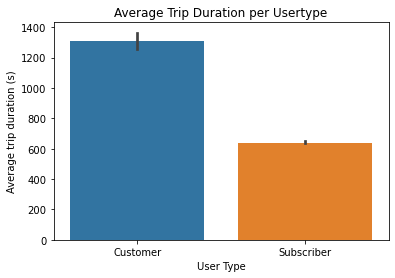

In [22]:
#2.Do members have a longer travel time then nonmembers?
sb.barplot(data=bikes, y="duration_sec", x="user_type")
plt.xlabel("User Type")
plt.ylabel("Average trip duration (s)")
plt.title('Average Trip Duration per Usertype')

How does the trip duration of Sebscribers campare to regular customers?
Subscribers then to make use of the service for much shorter trips

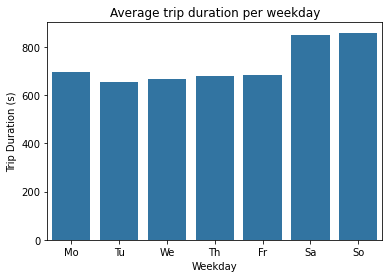

In [23]:
#3 Average travel time per weekday
total_time_weekday = bikes.groupby('weekday_start')['duration_sec'].sum()
count_time_weekday = bikes.groupby('weekday_start')['duration_sec'].count()
avg_time_weekday = total_time_weekday/count_time_weekday

sb.barplot(x=avg_time_weekday.index, y=avg_time_weekday.values, color=c)
plt.title("Average trip duration per weekday")
plt.xlabel("Weekday")
plt.ylabel("Trip Duration (s)")
plt.xticks([0,1,2,3,4,5,6],['Mo','Tu','We', 'Th','Fr',"Sa",'So']);


What is the average tripduration per weekday?
Interesting to see is that although during the week most trips are made per day the average tripduration is much shorter,

<AxesSubplot:xlabel='customer_age', ylabel='user_type'>

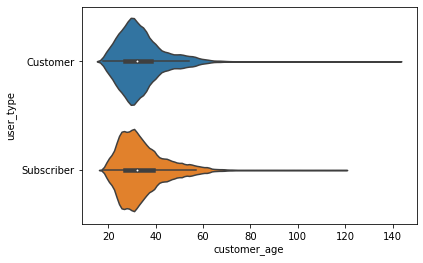

In [24]:
#Avg age of customer and non customers
#(Opproximate age of customer)
bikes['customer_age']= 2019-bikes['member_birth_year']

sb.violinplot(data=bikes, x='customer_age', y='user_type')

Does the age between customer and subscriber vary?
No it doesn't They seem to be pretty close.

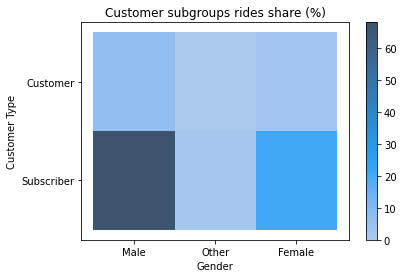

In [25]:
sb.histplot(data=bikes, x='member_gender', y='user_type', stat='percent',cbar=True)
plt.xlabel('Gender')
plt.ylabel('Customer Type')
plt.title('Customer subgroups rides share (%)');


How could you make a clear plot of the biggest customer groups and share in there rides?
The plot devides the customer into 6 groups where we clearly can see that most of the user are male and subscriber to the service.

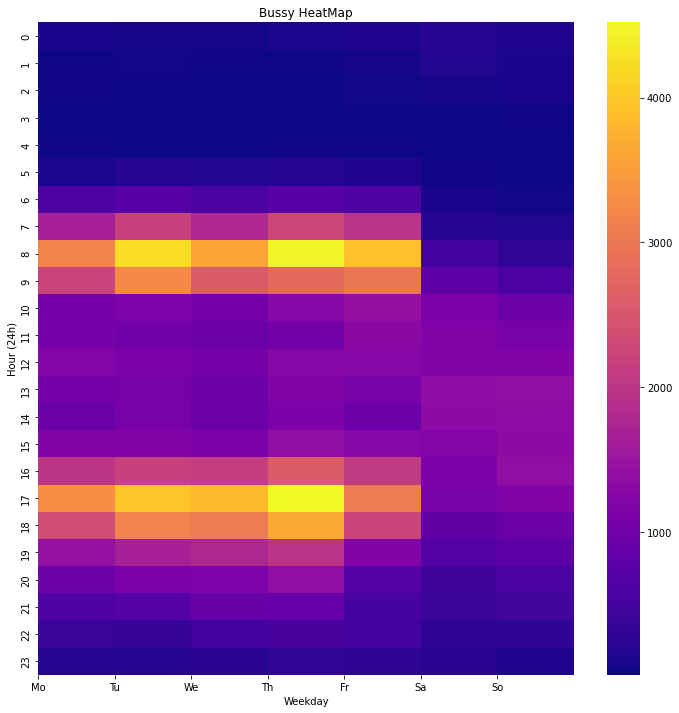

In [26]:
#Heastmap
test = bikes.groupby(['weekday_start', 'hour_start'])["duration_sec"].count()
test2 = test.reset_index()
test3= pd.pivot_table(test2, values='duration_sec', index='hour_start',columns='weekday_start')
fig = plt.figure(figsize=[12,12])
sb.heatmap(test3, cmap='plasma')
plt.ylabel('Hour (24h)')
plt.xlabel('Weekday')
plt.title("Bussy HeatMap")
plt.xticks([0,1,2,3,4,5,6],['Mo','Tu','We', 'Th','Fr',"Sa",'So']);

To clearly show the most bussiest moments during the day I made this heatmap.
We see that arround working ours the most trips are made. During the weekend there are no extrem peaks besides that but during the week we see some extra activety arround 8 and arround 17 a clock.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>  It shows that at certain hours most of the rides take place


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The age between Subscriber and Customer are prettymuch the same.
> The average trip duration of customer is much shorter compared to subscribers

## Multivariate Exploration

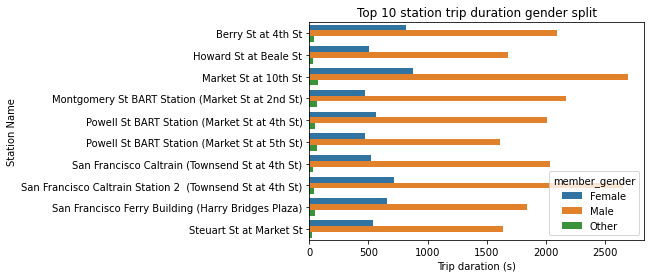

In [27]:
#Top used Start stations
topN = 10
s_list = bikes['start_station_name'].value_counts()[:topN]

sub_ss_bikes = bikes[bikes['start_station_name'].isin(s_list.index)].groupby(["start_station_name", "member_gender"])["duration_sec"].count().reset_index()

sb.barplot(data=sub_ss_bikes, y="start_station_name", x='duration_sec', hue='member_gender')
plt.xlabel("Trip daration (s)")
plt.ylabel("Station Name")
plt.title("Top 10 station trip duration gender split");

During what time off the day are the most rides made on what station and how is this compared to customer groups? We see that there isn't any clear or interesting outlier.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The Heatmaps show clearly on which day of the week during what time the most rides take place

### Were there any interesting or surprising interactions between features?

> Subscribers make use of the share services for shorte trips.

## Conclusions
During regular working ours most bikes are in use. It can be hard to get a bike than esspecialy around 8.am and 5pm.



In [28]:
bikes.to_csv("Final_BikeShareData_Ford.csv")